### Very Basic Extraction of Possibly Relevant Quotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
politicians = pd.read_csv("data/politicians.csv")

In [3]:
names = politicians.speaker

In [4]:
words = ['lesbian', 'gay', 'homosexual', 'gender', 'bisexual', 'sexuality', 'same sex'] # obviously add more

In [5]:
politicians

,state,speaker
0,Alabama,Richard Shelby
1,Alabama,Tommy Tuberville
2,Alaska,Lisa Murkowski
3,Alaska,Dan Sullivan
4,Arizona,Kyrsten Sinema
...,...,...
690,Texas,Van Taylor
691,Texas,Veronica Escobar
692,Florida,W. Gregory Steube
693,South Carolina,William R. Timmons IV


In [5]:
# only take rows with speakers in the congress or senator files
# only take rows with quotations that contain relevant words
chunk_num = 1
def process_chunk(chunk):
        print(f'Processing chunk with {len(chunk)} rows')
        
        return chunk.loc[chunk.speaker.isin(names) & (chunk.quotation.str.contains('{}'.format("|".join(words))))]
            
        

with pd.read_json('data/quotes-2015.json.bz2', lines=True, compression='bz2', chunksize=100000) as df_reader:
    for chunk in df_reader:
        processed_chunk = process_chunk(chunk)
        if (chunk_num == 1):
            dataframe15 = processed_chunk
            chunk_num += 1
        else:
            dataframe15 = pd.concat([dataframe15, processed_chunk])
        



KeyboardInterrupt: 

In [6]:
# Merge quote data with speaker state data
dataframe15=pd.read_csv("data/df15.csv")
merged = pd.merge(dataframe15, politicians, on='speaker', how='inner').drop(columns=['state_y', 'Unnamed: 0'])
merged.sample(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,state_x
769,2015-02-20-076754,The proposed wording would ensure that existin...,Mark Kelly,"['Q10326587', 'Q11770303', 'Q22261100', 'Q2870...",2015-02-20 14:51:42,2,"[['Mark Kelly', '0.5142'], ['None', '0.4858']]",['http://belfasttelegraph.co.uk/news/republic-...,E,Arizona
353,2015-05-21-030438,"I'm not evolving when it comes to gay rights,",Bernie Sanders,['Q359442'],2015-05-21 10:48:00,4,"[['Bernie Sanders', '0.8211'], ['None', '0.121...",['http://commondreams.org/views/2015/05/21/lef...,E,Vermont
194,2015-04-27-021071,I was asked my views on gay marriage and I sai...,Ted Cruz,['Q2036942'],2015-04-27 21:24:07,1,"[['Ted Cruz', '0.6483'], ['None', '0.2196'], [...",['http://breitbart.com/big-government/2015/04/...,E,Texas
51,2015-08-21-034484,I have a question about LGBT people being fire...,Ted Cruz,['Q2036942'],2015-08-21 20:24:29,1,"[['Ted Cruz', '0.5161'], ['None', '0.3443'], [...",['http://www.advocate.com/politics/2015/08/21/...,E,Texas
601,2015-05-19-017780,I believe it's important to expand the bill [ ...,Ted Lieu,['Q7693450'],2015-05-19 03:35:27,1,"[['Ted Lieu', '0.9044'], ['None', '0.0956']]",['http://www.buzzfeed.com/chrisgeidner/democra...,E,California
799,2015-09-17-023875,For those without a prior registration as a gu...,Paul Mitchell,"['Q20706988', 'Q27922634', 'Q28819608', 'Q3012...",2015-09-17 20:26:23,2,"[['Paul Mitchell', '0.8964'], ['None', '0.0908...",['http://cafwd.org/blog/entry/automatic-regist...,E,Michigan
316,2015-10-25-052615,There was a small minority opposed to discrimi...,Bernie Sanders,['Q359442'],2015-10-25 00:00:00,8,"[['Bernie Sanders', '0.5828'], ['None', '0.239...",['http://feeds.nbcnews.com/c/35002/f/663295/s/...,E,Vermont
419,2015-09-15-041842,I understand that issues such as abortion and ...,Bernie Sanders,['Q359442'],2015-09-15 01:51:37,1,"[['Bernie Sanders', '0.8378'], ['None', '0.123...",['http://news.bbc.co.uk/news/world-us-canada-3...,E,Vermont
781,2015-07-13-031693,would strike the use of gendered terms such as...,Lois Capps,['Q459693'],2015-07-13 15:20:00,2,"[['Lois Capps', '0.4131'], ['Franklin Graham',...",['http://www.thenewamerican.com/usnews/congres...,E,California
392,2015-12-07-016041,Demagogues throughout our history have attempt...,Bernie Sanders,['Q359442'],2015-12-07 06:28:00,18,"[['Bernie Sanders', '0.8132'], ['None', '0.113...",['http://feeds.washingtonpost.com/c/34656/f/63...,E,Vermont


In [7]:
merged.shape

(844, 10)

In [8]:
merged.quotation.sample(10)

654    Let's make it consistent across the board, whe...
403    Let us be clear. That's just not true. There w...
485    It is a document of limitation and it's suppos...
787    Given his well-documented abuses and prejudice...
287    We have the opportunity to follow through on o...
3      Despite this milestone, the battle for LGBT ri...
785    ensure that the code reflects marriage equalit...
389    They have been dividing white from black, stra...
657    If gay marriage is to be the policy of this la...
799    For those without a prior registration as a gu...
Name: quotation, dtype: object

Visualisation by states

In [9]:
merged.state_x.value_counts()

Texas                   198
Vermont                 158
Florida                  91
California               62
Kentucky                 51
Illinois                 31
South Carolina           24
New York                 17
Colorado                 14
Wisconsin                13
Iowa                     12
Washington               12
Arizona                  11
New Jersey               11
Georgia                  11
Ohio                     11
Hawaii                   10
Kansas                    9
Arkansas                  8
Utah                      8
Maine                     8
Virginia                  7
Oregon                    6
Louisiana                 6
Tennessee                 5
Alaska                    5
Oklahoma                  5
Massachusetts             5
Nevada                    4
Maryland                  4
Pennsylvania              3
Minnesota                 3
Nebraska                  3
Connecticut               3
Michigan                  3
Delaware            

**Let's see what is the distribution of speakers per state on the matter of gay rights**

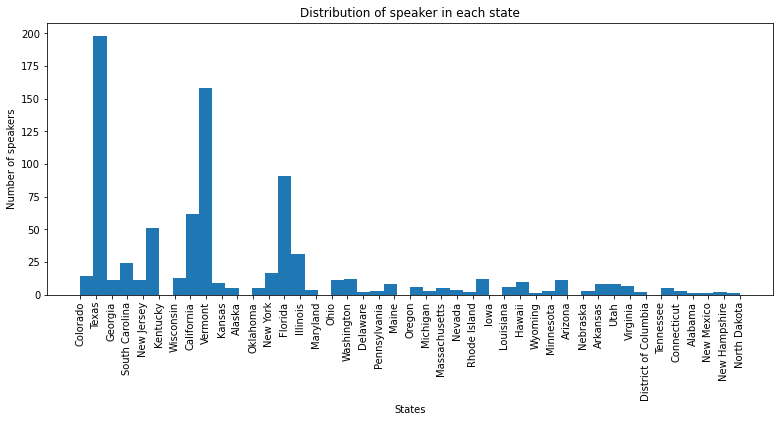

In [10]:
plt.figure(figsize=(13,5))
plt.hist(merged.state_x, bins= 50)
plt.xlabel('States')
plt.ylabel('Number of speakers')
plt.title('Distribution of speaker in each state')
plt.xticks(rotation = 90)
plt.show()

**Now, we want to see the distribution of hatecrime due to sexual orientation in each state.**

In [11]:
#Let's upload our data on hatecrime. We only keep data relevant for our subject, that is sexual orientation and gender identity
hc2015=pd.read_csv('data/hatecrime2015.csv')
hc2015.sort_index()
hc2015=hc2015.drop(columns=['Agency Type', 'Race/\nEthnicity/\nAncestry', 'Religion','Disability','Gender', '1st\nquarter'
                    , '2nd\nquarter','3rd\nquarter', '4th\nquarter', 'Agency name' ])

In [13]:
#remove unrelevant line spotted in the file
for i in range(1988):
    if (hc2015.State.loc[i]=='3 Includes one incident reported with more than one bias motivation.'):
        hc2015.State.loc[i]='NaN'

In [14]:
#The state value is filled once and then only NaN value for all the following rows until new state, therefore we fill in
# the NaN value with the relevant State 
hc=hc2015.fillna(method='ffill', axis=0)
hc=hc.rename(columns = {'Sexual\norientation': 'sexual_orientation', 'Gender\nIdentity': 'gender_identity'})

In [15]:
#last lines are non valid, therefore we drop it
hc=hc.drop(labels=[1980,1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988], axis=0)

In [16]:
nb_hc=hc.groupby(['State']).sum()

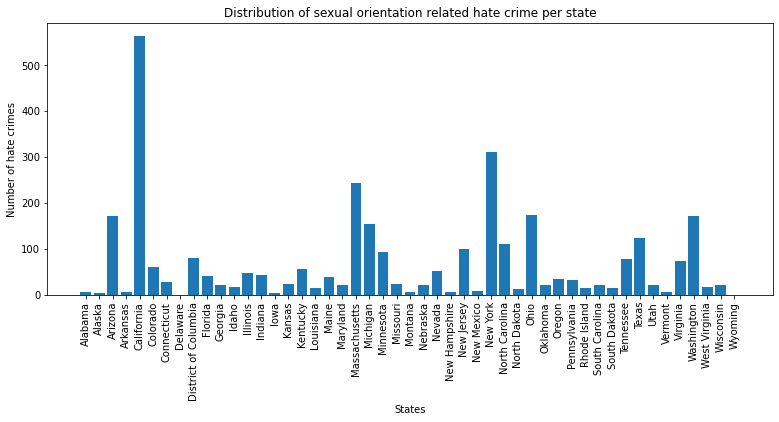

In [27]:
#let's plot the distribution of sexual orientation related hate crime per state
plt.figure(figsize=(13,5))
plt.bar(nb_hc.index, nb_hc.sexual_orientation)
plt.xlabel('States')
plt.ylabel('Number of hate crimes')
plt.title('Distribution of sexual orientation related hate crime per state')
plt.xticks(rotation = 90)
plt.show()

We can see that California has the highest number of hate crime related to sexual orientation. It is interesting to point it out as we have seen in the previous plot that California has lots of speakers on the matter of gay rights. 

Indeed, after looking up on Internet, hate crimes with a sexual orientation bias are the second most common type of hate crime over 2006-2015 in California.

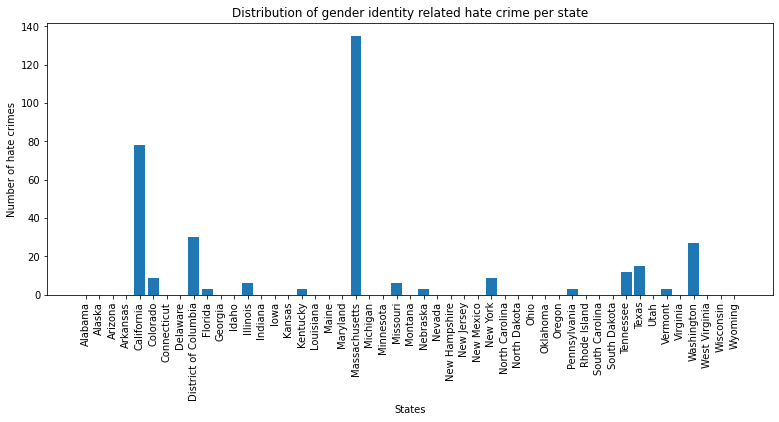

In [28]:
#same plot but for gender identity
plt.figure(figsize=(13,5))
plt.bar(nb_hc.index, nb_hc.gender_identity)
plt.xlabel('States')
plt.ylabel('Number of hate crimes')
plt.title('Distribution of gender identity related hate crime per state')
plt.xticks(rotation = 90)
plt.show()

We can see that gender identity related hate crime are not present in lots of state. It is probably because in 2015, we were less talking about gender identity than nowadays. Therefore, probably less people reported it as gender identity hate crime.
Nevertheless, we can see that in Massachussetts and California, there have been important number of agressions. For Massachussetts, there are approximately same number of hate crime due to gender identity and sexual orientation, therfeore the whole lgbtqa+ community is very much targeted. 

In [19]:
#get the number of occurences of all the quotations for a state
grouped_by_state = merged.groupby('state_x').agg({'numOccurrences' : sum})#sum()

#Add a column with the number of different quotations for a state
grouped_by_state['numQuotations']= merged.state_x.value_counts()
grouped_by_state.sort_values(by = 'numOccurrences', ascending=False)

,numOccurrences,numQuotations
state_x,,
Vermont,980,158
Texas,625,198
Florida,312,91
Kentucky,258,51
Utah,165,8
California,104,62
Massachusetts,95,5
Arkansas,95,8
South Carolina,92,24


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

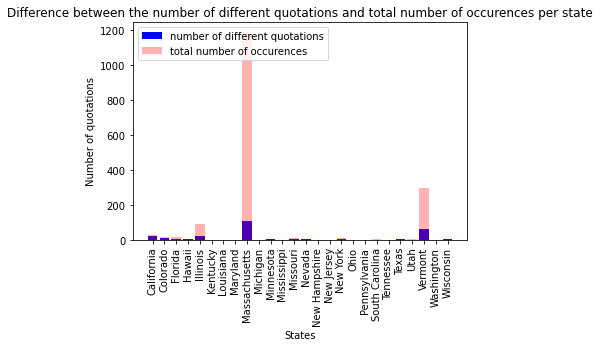

In [21]:
plt.bar(grouped_by_state.index, grouped_by_state.numQuotations, color='blue', label = "number of different quotations" )
plt.bar(grouped_by_state.index, grouped_by_state.numOccurrences, alpha=0.3, color='red', label="total number of occurences")
plt.legend(loc='upper left')
plt.xlabel('States')
plt.ylabel('Number of quotations')
plt.title('Difference between the number of different quotations and total number of occurences per state')
plt.xticks(rotation=90)

plt.plot

This graph which represents differences between the number of different quotations and total number of occurences per state allows us to deduce if the topic of LGBT community is in the spotlights in specific states. 

Indeed, we can directly see in which sates there are a larger number of quotations and how many times there are quoted. For example, we can observe that in the state of vermont, the subject is widely spoken whereas in New Mexico there is only one quotation about the topic.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

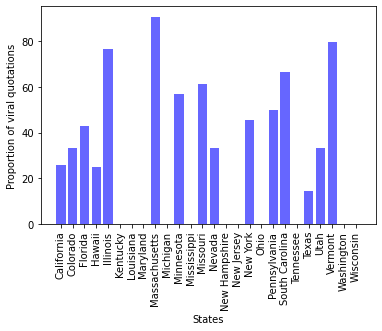

In [23]:
grouped_by_state['proportional_numQuotations'] = (grouped_by_state.numQuotations/grouped_by_state.numOccurrences)*100

plt.bar(grouped_by_state.index, 100-grouped_by_state.proportional_numQuotations, color='blue', alpha=0.6, label = "number of different quotations" )
plt.xlabel('States')
plt.ylabel('Proportion of viral quotations')
plt.xticks(rotation=90)
plt.plot

In [10]:
#read hate_crime_2015:
hate_crime=pd.read_csv("data/hatecrime2015.csv")
hate_crime
hate_crime.sort_index()


,State,Agency Type,Agency name,Race/\nEthnicity/\nAncestry,Religion,Sexual\norientation,Disability,Gender,Gender\nIdentity,1st\nquarter,2nd\nquarter,3rd\nquarter,4th\nquarter,Population1
0,Alabama,Total,NaN,8.0,0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,NaN,Cities,NaN,8.0,0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Birmingham,3.0,0,2.0,0.0,0.0,0.0,1.0,1.0,1,2.0,"212,291"
3,NaN,NaN,Hoover,4.0,0,0.0,0.0,0.0,0.0,0.0,3.0,1,0.0,"85,163"
4,NaN,NaN,Prattville,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,"35,637"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,3 Includes one incident reported with more tha...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### NAOMIE: (avant c elsa)

In [21]:
#file lgbt population:
lgbtpopulation=pd.read_csv("data/lgbtpopulation2021.csv")

#clean it:
lgbtpopulation=lgbtpopulation.dropna(how='any', axis=0)
lgbtpopulation.groupby("STATE").sum()
lgbtpopulation.sample(10)

,STATE,TOTAL ADULT POPULATION,LGBT ADULT POPULATION,LGBT POPULATION DENSITY,% OF LGBTQ INDIVIDUALS RAISING CHILDREN,% OF SAME-SEX COUPLES RAISING CHILDREN
32,NEW JERSEY,"8,908,520","343,000",4.100%,25.00%,19.700%
33,NEW MEXICO,"2,095,428","85,000",4.500%,29.00%,17.800%
3,ARIZONA,"7,171,646","286,000",4.500%,25.00%,16.500%
41,PENNSYLVANIA,"12,807,060","490,000",4.100%,27.00%,15.900%
34,NEW YORK,"19,542,209","913,000",5.100%,22.00%,16.400%
38,OHIO,"11,689,442","462,000",4.300%,30.0%,17.700%
24,MICHIGAN,"9,995,915","373,000",4.00%,27.00%,18.200%
43,RHODE ISLAND,"1,057,315","44,000",4.500%,19.00%,15.500%
14,IDAHO,"1,754,208","48,000",2.800%,44.00%,22.300%
54,WISCONSIN,"5,813,568","207,000",3.800%,29.00%,16.400%


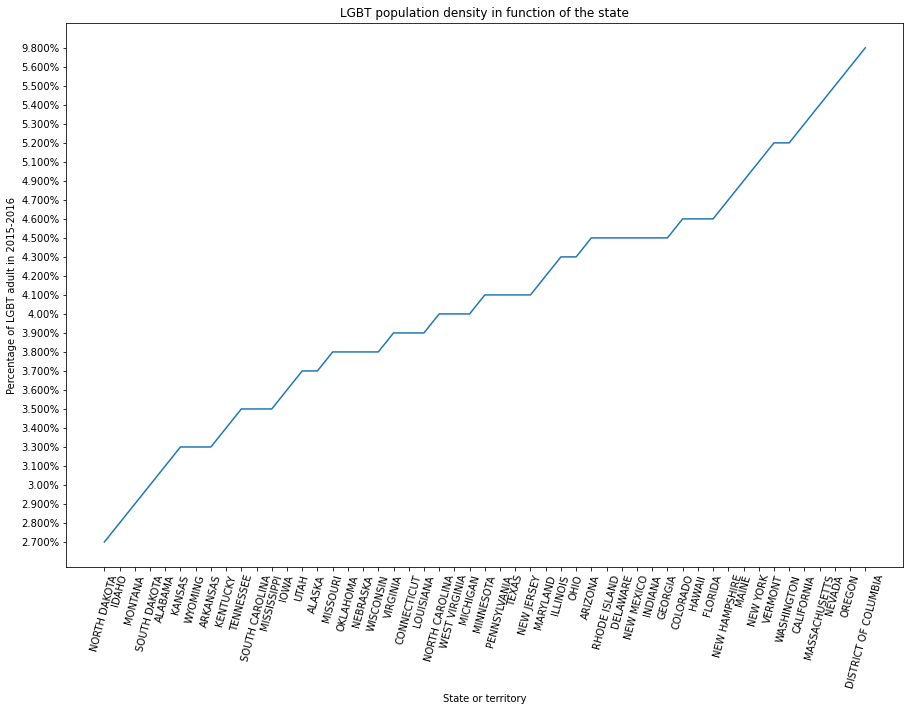

In [22]:
lgbtpopulation=lgbtpopulation.sort_values(by=['LGBT POPULATION DENSITY'], axis=0)
plt.figure(figsize=(15,10))
plt.plot(lgbtpopulation['STATE'], lgbtpopulation['LGBT POPULATION DENSITY'])
plt.title("LGBT population density in function of the state")
plt.xticks(rotation=75)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.show()

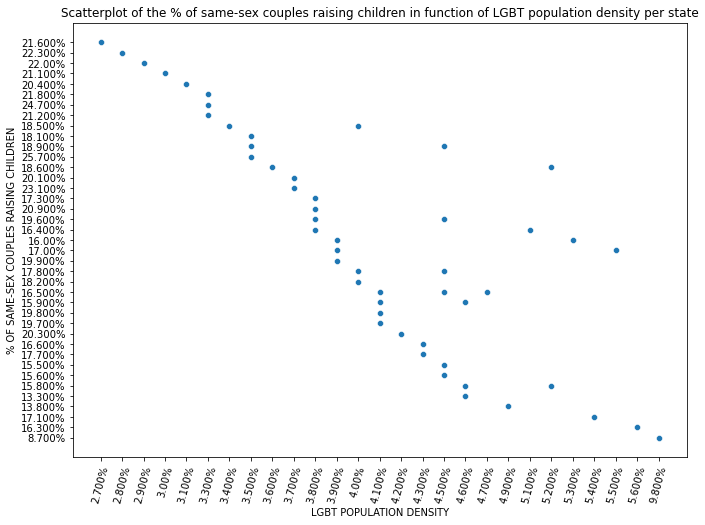

In [13]:
#Correlation between LGBT population density and % OF SAME-SEX COUPLES RAISING CHILDREN??
fig, ax = plt.subplots()
fig.set_size_inches(11.0, 8.0)
plt.xticks(rotation=75)
sns.scatterplot(data=lgbtpopulation, x='LGBT POPULATION DENSITY', y='% OF SAME-SEX COUPLES RAISING CHILDREN', ax=ax).set(title="Scatterplot of the % of same-sex couples raising children in function of LGBT population density per state") 
plt.show()

We will discuss it later, here we are just doing some pre-processing steps and visualizations but it seems that we have a correlation between these two categories.

In [24]:
#file lgbtsummary
lgbtsummary=pd.read_csv("data/lgbtsummary.csv")
lgbtsummary=lgbtsummary[:-1] #remove last row to sort by increasing population rank
lgbtsummary=lgbtsummary[['Pop.rank', 'State or territory', '2015–2016 LGBTadult percentageestimate[7]', '2016 transgender adult percentage estimate[2]']]
lgbtsummary=lgbtsummary.rename(columns={"2015–2016 LGBTadult percentageestimate[7]": "Percentage of LGBT adult in 2015-2016", "2016 transgender adult percentage estimate[2]": "Percentage of transgender adult in 2016"})
lgbtsummary.head(lgbtsummary.shape[0]) 


,Pop.rank,State or territory,Percentage of LGBT adult in 2015-2016,Percentage of transgender adult in 2016
0,1,California,4.8%,0.76%
1,2,Texas,3.6%,0.66%
2,3,New York,4.5%,0.51%
3,4,Florida,4.2%,0.66%
4,5,Illinois,3.7%,0.51%
5,6,Ohio,3.8%,0.45%
6,7,Michigan,3.8%,0.43%
7,8,Georgia,4.0%,0.75%
8,9,Pennsylvania,3.6%,0.44%
9,10,New Jersey,3.6%,0.44%


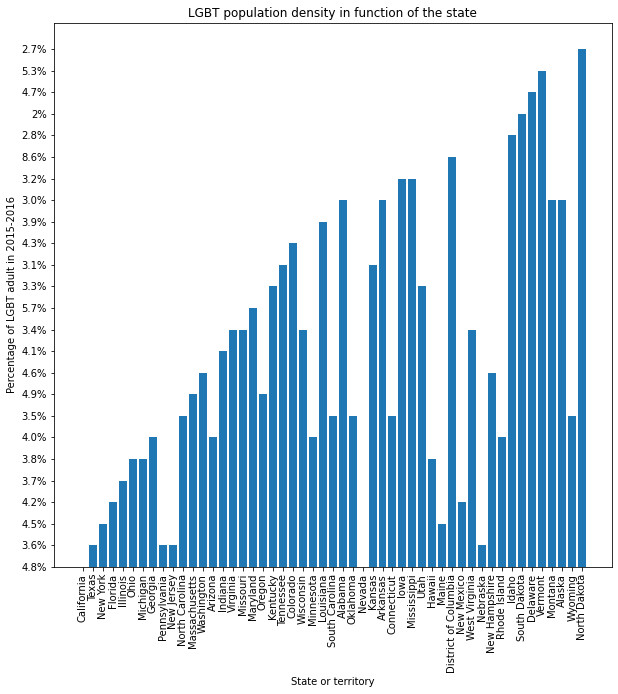

In [26]:
#visualizations:
plt.figure(figsize=(10,10))
plt.bar(lgbtsummary['State or territory'],lgbtsummary['Percentage of LGBT adult in 2015-2016'])
plt.xticks(rotation=90)
plt.xlabel("State or territory")
plt.ylabel("Percentage of LGBT adult in 2015-2016")
plt.title("LGBT population density in function of the state")
plt.show()

#### can do the same for each year...

In [16]:
dataframe20=pd.read_csv("data/df20.csv")
merged = pd.merge(dataframe20, politicians, on='speaker', how='inner')
merged20=merged.drop(columns=['state_y', 'Unnamed: 0'])
merged20.sample(10)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,state_x
88,2020-03-02-066752,transgender people of color are disproportiona...,Elizabeth Warren,['Q434706'],2020-03-02 19:30:53,1,"[['Elizabeth Warren', '0.8662'], ['None', '0.1...",['https://www.laweekly.com/time-for-tea-the-de...,E,Massachusetts
102,2020-02-21-053141,So I'd like to talk about who we're running ag...,Elizabeth Warren,['Q434706'],2020-02-21 05:26:44,4,"[['Elizabeth Warren', '0.8673'], ['None', '0.0...",['https://www.wnd.com/2020/02/debate-aftermath...,E,Massachusetts
7,2020-02-20-057983,running against a billionaire who calls women ...,Elizabeth Warren,['Q434706'],2020-02-20 02:36:09,1,"[['Elizabeth Warren', '0.919'], ['None', '0.07...",['https://kvia.com/your-voice-your-vote/politi...,E,Massachusetts
245,2020-01-29-075417,Researchers examined a representative sample o...,Tulsi Gabbard,['Q32620'],2020-01-29 20:58:00,1,"[['Tulsi Gabbard', '0.6604'], ['None', '0.3396']]",['http://feeds.towleroad.com/~r/towleroad/feed...,E,Hawaii
146,2020-01-18-013699,I could say a lot of bad things about Trump an...,Bernie Sanders,['Q359442'],2020-01-18 21:48:50,2,"[['Bernie Sanders', '0.7919'], ['None', '0.161...",['https://www.seacoastonline.com/news/20200118...,E,Vermont
112,2020-01-02-032650,It's about acknowledging there is an enormous ...,Sam Johnson,"['Q19799878', 'Q19876548', 'Q19879328', 'Q1988...",2020-01-02 11:13:50,1,"[['Sam Johnson', '0.7022'], ['None', '0.2978']]",['https://www.pcr-online.biz/2020/01/02/divers...,E,Texas
233,2020-02-12-057732,It's the same job as if he was a different gen...,Jared Polis,['Q935734'],2020-02-12 12:46:24,2,"[['Jared Polis', '0.6738'], ['None', '0.3051']...",['https://www.washingtonblade.com/2020/02/12/c...,E,Colorado
182,2020-03-06-022971,I hope that others can respect that for me bei...,Aaron Schock,"['Q24705735', 'Q302659']",2020-03-06 21:15:35,2,"[['Aaron Schock', '0.9136'], ['None', '0.0749'...",['http://abc7.com/former-gop-lawmaker-came-out...,E,Illinois
79,2020-02-20-010539,can call women fat broads and horse-face lesbi...,Elizabeth Warren,['Q434706'],2020-02-20 00:00:00,2,"[['Elizabeth Warren', '0.8829'], ['None', '0.1...",['http://feeds.foxnews.com/~r/foxnews/politics...,E,Massachusetts
41,2020-01-31-040729,I will create a new grant program within the O...,Elizabeth Warren,['Q434706'],2020-01-31 10:00:00,1,"[['Elizabeth Warren', '0.5165'], ['None', '0.4...",['http://www.out.com/commentary/2020/1/31/out-...,E,Massachusetts
